## Bike Sharing Assignment

#### Business overview

BoomBikes is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### Concerns/Issues

BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1: Reading & Understanding the data

In [2]:
#reading the data
Bikesharing = pd.read_csv("day.csv")
Bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
Bikesharing.shape

(730, 16)

In [4]:
Bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Note

- As there are no nulls, we can proceed with further development

In [5]:
Bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Note

- Dropping unnecessary columns

In [6]:
Bikesharing.drop(['instant','casual','registered','atemp','dteday'], axis=1, inplace=True)

In [7]:
Bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Note

- Plotting a heatmap to see the correlations between variables

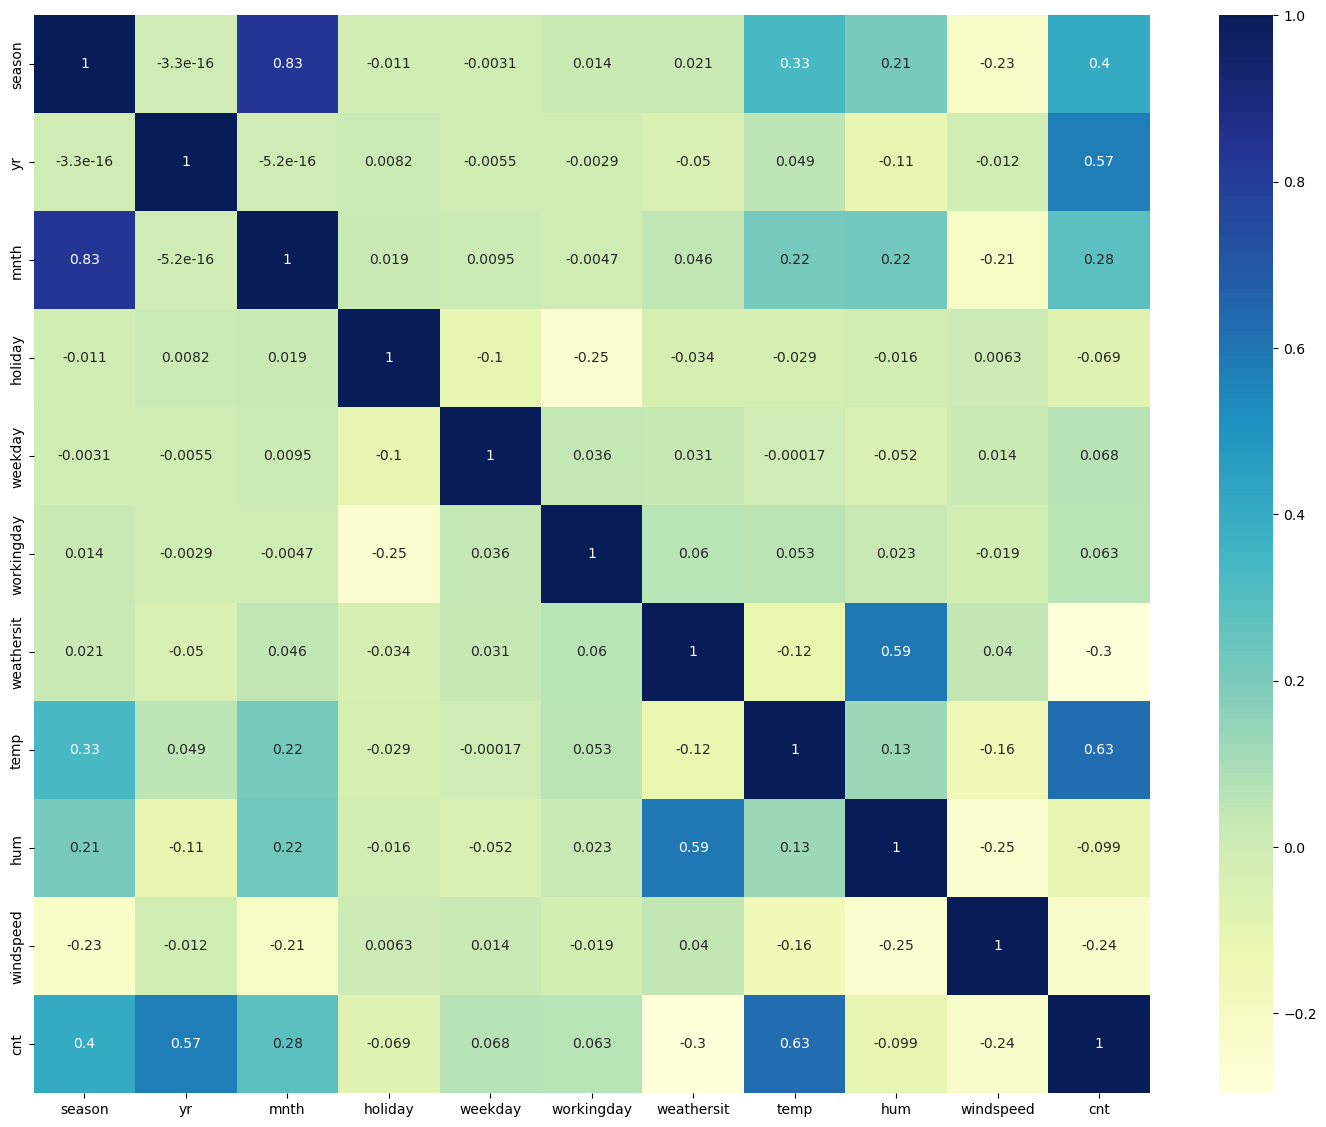

In [8]:
plt.figure(figsize=(18,14))
sns.heatmap(Bikesharing.corr(), cmap='YlGnBu', annot=True)
plt.show()

## Observation

- It can be seen that temp is highly correlated with our target variable cnt

In [9]:
# Assigning values to these fields as per the data dictionary for easy understanding of further visualizations
Bikesharing['weathersit']=Bikesharing['weathersit'].map(
                {
                    1 :'Clear_cloudy', 
                    2: 'Mist_Few_clouds', 
                    3: 'Snow_Rain_Thunderstorm', 
                    4 :'Heavy_Rain_Snow_Fog'
                })
Bikesharing['season']=Bikesharing['season'].map({1 :'spring', 2: 'summer', 3: 'fall', 4 :'winter' })
Bikesharing['weekday'] = Bikesharing['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
Bikesharing['mnth'] = Bikesharing['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12:'dec'})
Bikesharing['yr']=Bikesharing['yr'].map({0 :'2018', 1: '2019'})

# 2: Visualising the data

<Figure size 2000x1200 with 0 Axes>

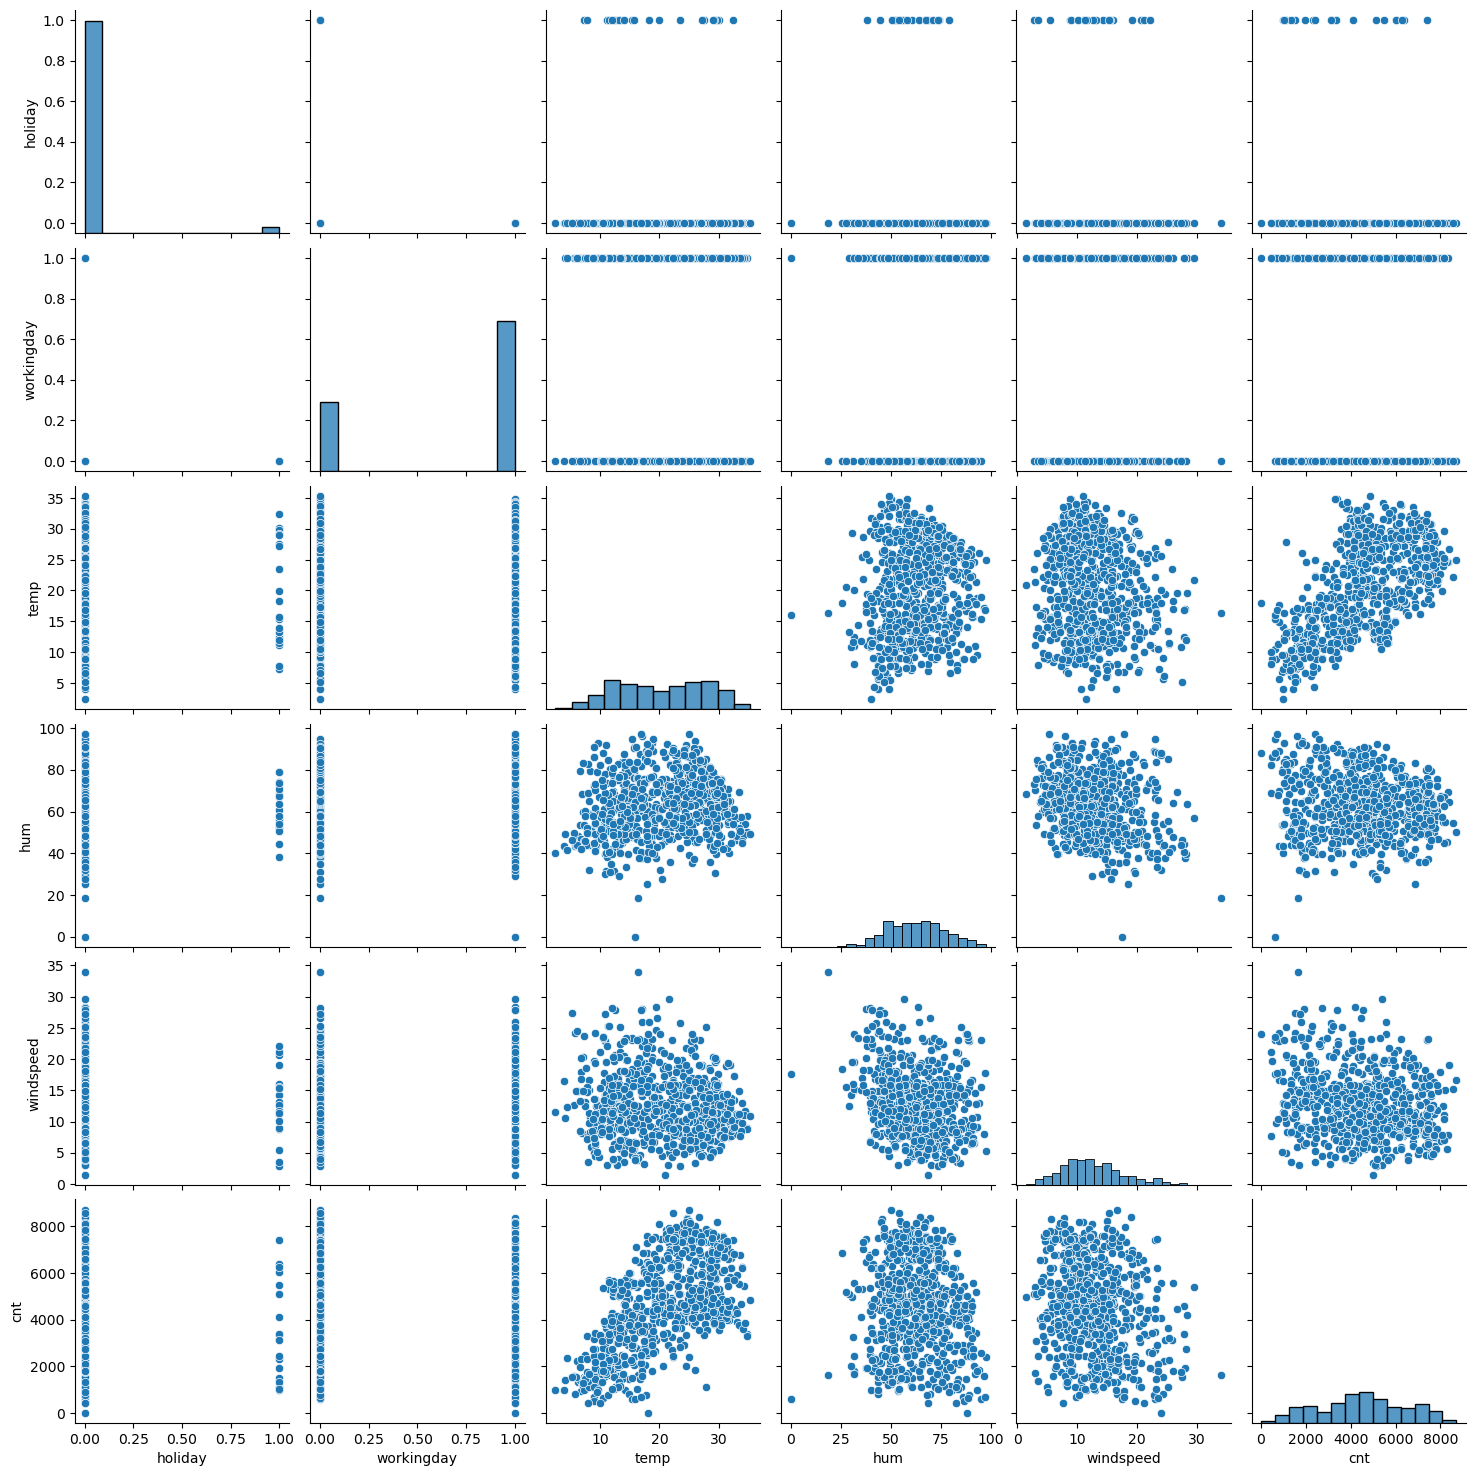

In [10]:
plt.figure(figsize= (20,12))
sns.pairplot(Bikesharing)
plt.show()

### Observation

- From the above scatter plot, its confirmed that temp and cnt have linear progression between them. 
- We can proceed with Linear progression model building

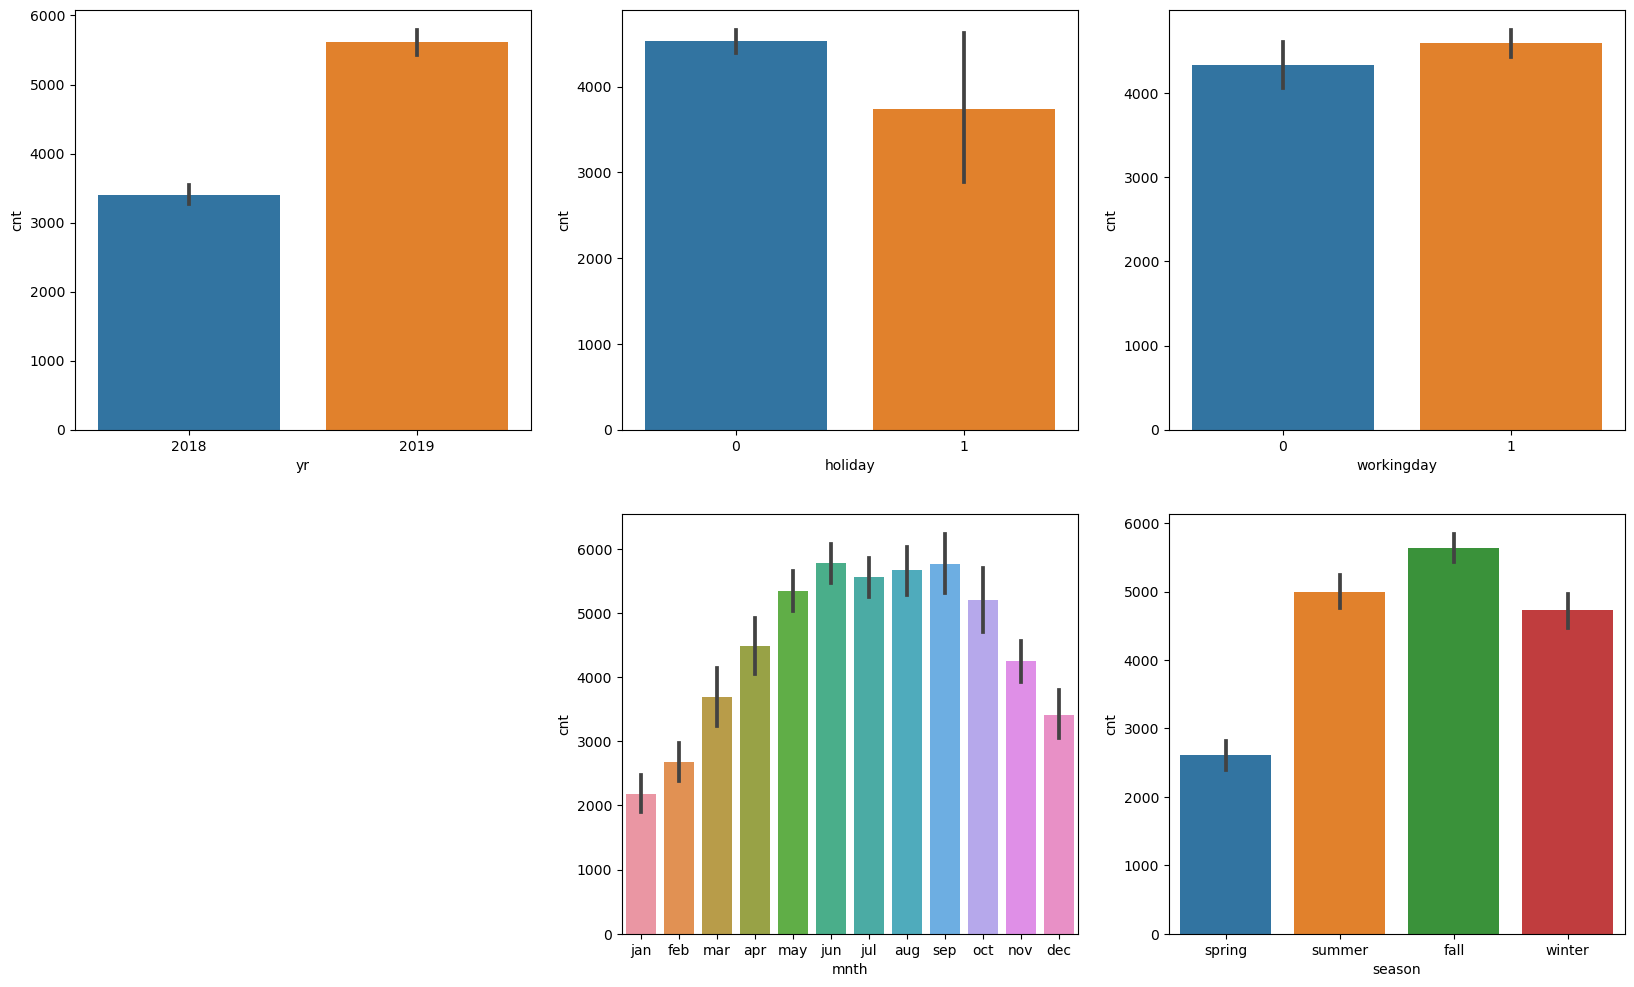

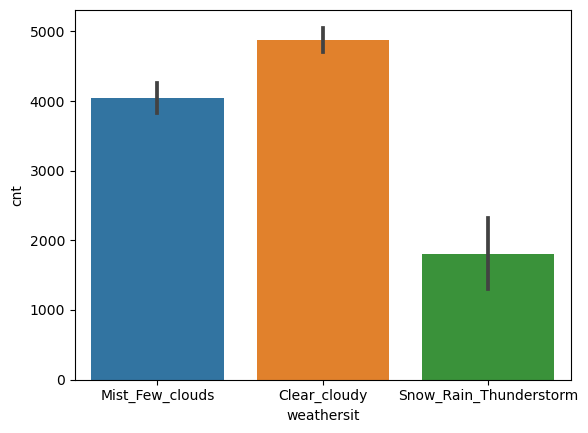

In [11]:
# Checking for patterns between different variables and Target variable

plt.figure(figsize= (20,12))
plt.subplot(2,3,1)
sns.barplot(x="yr",y = "cnt",data = Bikesharing)
plt.subplot(2,3,2)
sns.barplot(x = 'holiday', y = 'cnt', data = Bikesharing)
plt.subplot(2,3,3)
sns.barplot(x = 'workingday', y = 'cnt', data = Bikesharing)
plt.subplot(2,3,5)
sns.barplot(x = 'mnth', y = 'cnt', data = Bikesharing)
plt.subplot(2,3,6)
sns.barplot(x = 'season', y = 'cnt', data = Bikesharing)
plt.show()
sns.barplot(x = 'weathersit', y = 'cnt', data = Bikesharing)
plt.show()

### Observations

- Year 2019 has seen surge in users
- More number of users on Working day
- When the weather is Clear, we can see more number of users hiring bikes
- Maximum hiring can be seen in Fall

# 3: Preparing the data

In [12]:
#Creating Dummies for yr/mnth/season/weathersit/weekday and dropping the original columns from model
status = pd.get_dummies(Bikesharing['yr'], drop_first = True)
Bikesharing = pd.concat([Bikesharing,status],axis=1)
status = pd.get_dummies(Bikesharing['mnth'], drop_first = True)
Bikesharing = pd.concat([Bikesharing,status],axis=1)
status = pd.get_dummies(Bikesharing['season'], drop_first = True)
Bikesharing = pd.concat([Bikesharing,status],axis=1)
status = pd.get_dummies(Bikesharing['weathersit'], drop_first = True)
Bikesharing = pd.concat([Bikesharing,status],axis=1)
status = pd.get_dummies(Bikesharing['weekday'], drop_first = True)
Bikesharing = pd.concat([Bikesharing,status],axis=1)
Bikesharing.drop(['yr','mnth','season','weathersit','weekday'],axis=1,inplace = True)
Bikesharing.head()


,holiday,workingday,temp,hum,windspeed,cnt,2019,aug,dec,feb,...,summer,winter,Mist_Few_clouds,Snow_Rain_Thunderstorm,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 4: Splitting the data

In [13]:
#Importing SKLEARN library
import sklearn
from sklearn.model_selection import train_test_split

In [14]:
df_train, df_test = train_test_split(Bikesharing,train_size = 0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


# 5: Scaling

In [15]:
#min_max scaling
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

#Scaling numerical variables
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()
df_train.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', '2019',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'spring', 'summer', 'winter', 'Mist_Few_clouds',
       'Snow_Rain_Thunderstorm', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [17]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [18]:
#splitting x,y variables of train dataset
y_train = df_train.pop('cnt')
X_train = df_train

In [19]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,2019,aug,dec,feb,jan,...,summer,winter,Mist_Few_clouds,Snow_Rain_Thunderstorm,Mon,Sat,Sun,Thu,Tue,Wed
576,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
728,0,0,0.245101,0.498067,0.663106,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
111,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [20]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [21]:
import statsmodels.api as sm

In [22]:
Bikesharing.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', '2019',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'spring', 'summer', 'winter', 'Mist_Few_clouds',
       'Snow_Rain_Thunderstorm', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

# 6: Building the model

In [23]:
# add constant to X_train data and train the model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()      #Fitting the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          3.00e-181
Time:                        16:29:29   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2431      0.035      6.888      0.000       0.174       0.312
holiday                    0.0100      0.024      0.418      0.676      -0.037       0.057
workingday                 0.0962      0.012      7.835      0.000       0.072       0.120
temp                       0.4454      0.046      9.628      0.000       0.354       0.536
hum                       -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                 -0.1860      0.026     -7.226      0.000      -0.237      -0.135
2019                       0.2324      0.008     28.819      0.000       0.217       0.248
aug                        0.0204      0.034      0.607      0.544      -0.046       0.086
dec                       -0.0443      0.034     -1.317      0.189      -0.110       0.022
feb                       -0.0324      0.033     -0.985      0.325      -0.097       0.032
jan                       -0.0633      0.034     -1.885      0.060      -0.129       0.003
jul                       -0.0338      0.035     -0.969      0.333      -0.102       0.035
jun                        0.0046      0.025      0.186      0.853      -0.044       0.053
mar                        0.0013      0.025      0.052      0.959      -0.047       0.050
may                        0.0247      0.021      1.173      0.241      -0.017       0.066
nov                       -0.0399      0.036     -1.096      0.274      -0.111       0.032
oct                        0.0075      0.036      0.210      0.834      -0.063       0.078
sep                        0.0859      0.032      2.692      0.007       0.023       0.149
spring                    -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer                     0.0430      0.026      1.645      0.101      -0.008       0.094
winter                     0.1076      0.028      3.853      0.000       0.053       0.163
Mist_Few_clouds           -0.0596      0.010     -5.709      0.000      -0.080      -0.039
Snow_Rain_Thunderstorm    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mon                       -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat                        0.0956      0.014      6.958      0.000       0.069       0.123
Sun                        0.0413      0.014      2.964      0.003       0.014       0.069
Thu                       -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue                       -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed                       -0.0055      0.015     -0.368      0.713      -0.035       0.024
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Checking for VIF values of the model
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,features,VIF
1,workingday,85.54
23,Sat,19.71
24,Sun,18.34
17,spring,10.75
19,winter,9.44
18,summer,8.27
2,temp,7.08
14,nov,6.79
15,oct,6.47
6,aug,6.36


## Note
- Remove those columns where P value and VIF are high.

In [26]:
x = X_train.drop(['aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct','spring', 'summer','Mon','Thu', 'Tue', 'Wed','holiday'],axis = 1)

In [27]:
#re-training the model after removing few unwanted variables
X_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          6.58e-176
Time:                        16:29:29   Log-Likelihood:                 472.49
No. Observations:                 510   AIC:                            -921.0
Df Residuals:                     498   BIC:                            -870.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1168      0.039      2.994      0.003       0.040       0.193
workingday                 0.1115      0.028      4.037      0.000       0.057       0.166
temp                       0.5865      0.021     27.444      0.000       0.545       0.628
hum                       -0.1461      0.040     -3.632      0.000      -0.225      -0.067
windspeed                 -0.1625      0.027     -5.939      0.000      -0.216      -0.109
2019                       0.2295      0.009     26.353      0.000       0.212       0.247
sep                        0.0770      0.016      4.712      0.000       0.045       0.109
winter                     0.1123      0.011     10.551      0.000       0.091       0.133
Mist_Few_clouds           -0.0513      0.011     -4.558      0.000      -0.073      -0.029
Snow_Rain_Thunderstorm    -0.2486      0.028     -8.789      0.000      -0.304      -0.193
Sat                        0.1190      0.029      4.079      0.000       0.062       0.176
Sun                        0.0655      0.029      2.232      0.026       0.008       0.123
==============================================================================
Omnibus:                       44.273   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.328
Skew:                          -0.517   Prob(JB):                     6.61e-20
Kurtosis:                       4.757   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#check VIF values to see if any columns can be abandoned
vif = pd.DataFrame()
vif['features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,features,VIF
2,hum,25.13
0,workingday,15.40
1,temp,8.28
3,windspeed,4.28
9,Sat,4.19
10,Sun,4.14
7,Mist_Few_clouds,2.19
4,2019,2.05
6,winter,1.51
8,Snow_Rain_Thunderstorm,1.19


# Note
- Though hum and workingday has high VIF, their p value is significant. So, abandoning these is not a good idea.

In [29]:
#predicting cnt values based on the model built
y_train_pred = lr_model.predict(X_train_sm)

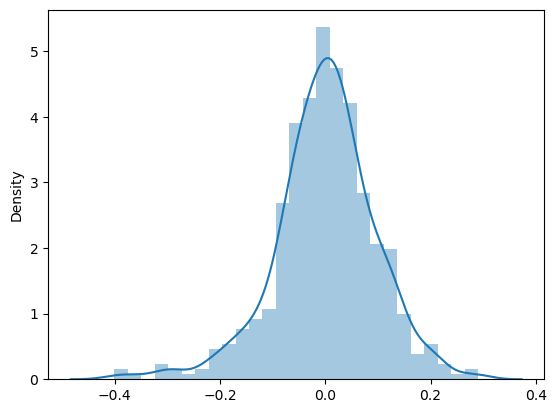

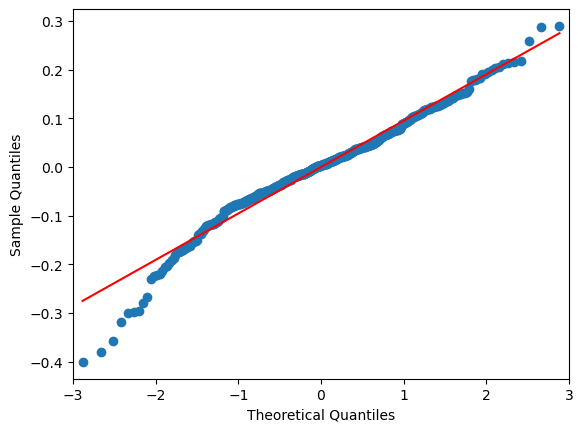

In [30]:
#checking if the residual are following normal distribution
res = y_train-y_train_pred
sns.distplot(res)
sm.qqplot(res, line ='r')
plt.show()

In [31]:
#scaling the test data
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,2019,aug,dec,feb,...,summer,winter,Mist_Few_clouds,Snow_Rain_Thunderstorm,Mon,Sat,Sun,Thu,Tue,Wed
184,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
535,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
221,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [32]:
#defining independent and target variables
y_test = df_test.pop('cnt')
x_test = df_test

In [33]:
#add constant to the x_test data
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,holiday,workingday,temp,hum,windspeed,2019,aug,dec,feb,...,summer,winter,Mist_Few_clouds,Snow_Rain_Thunderstorm,Mon,Sat,Sun,Thu,Tue,Wed
184,1.0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
535,1.0,0,1,0.901354,0.610133,0.153728,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
221,1.0,0,1,0.881625,0.437098,0.339570,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
152,1.0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [34]:
x_test_sm.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', '2019',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'spring', 'summer', 'winter', 'Mist_Few_clouds',
       'Snow_Rain_Thunderstorm', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [35]:
x_test_sm = x_test_sm.drop(['aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct','spring', 'summer','Mon','Thu', 'Tue', 'Wed','holiday'],axis =1)

In [36]:
#predicting y values as per model built
y_test_pred = lr_model.predict(x_test_sm)

In [37]:
from sklearn.metrics import r2_score

In [38]:
#checking the accuracy of the model by comparing test and prediction values
r2_score(y_test,y_pred = y_test_pred)

0.7825628466253918

Text(0, 0.5, 'y_pred')

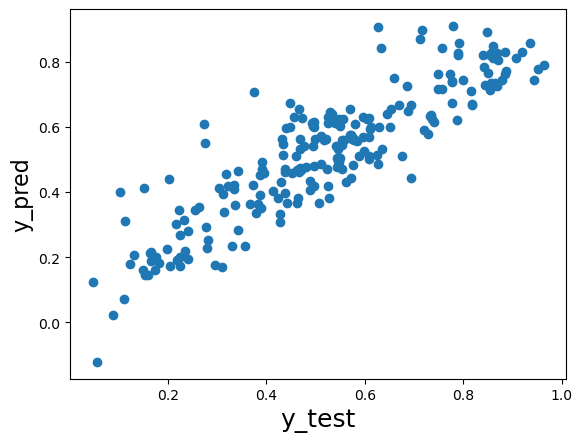

In [39]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)             
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)

Text(0, 0.5, 'residual')

<Figure size 200x100 with 0 Axes>

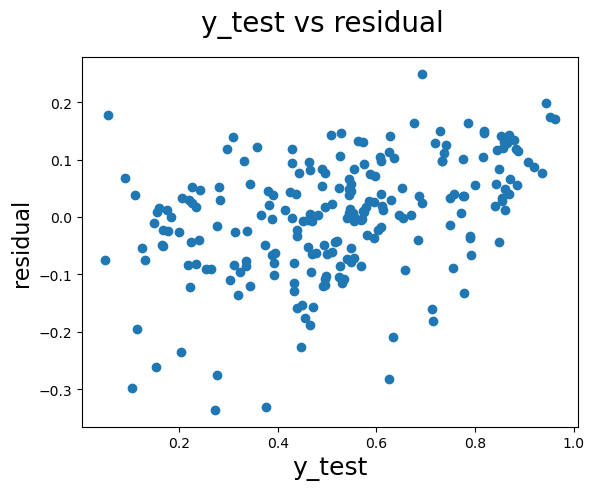

In [43]:
plt.figure(figsize= (2,1))
fig = plt.figure()
plt.scatter(y_test,(y_test - y_test_pred))
fig.suptitle('y_test vs residual', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('residual', fontsize=16)

The final equation is 

0.1168+0.1115workingday+0.5865temp-0.1461hum-0.1625windspeed+0.2295*2019+0.0770sep+0.1123winter-0.0513Mist_few_clouds-0.2486snow_rain_thunderstrom+0.1190sat+0.0655sun